# 앙상블 주식 채권 비중별

- 투자 자산 : 주식(코스피200, SPY), 채권(20년 만기 국고채, TLT)
- 투자비율 : 다음과 같은 11개의 포트폴리오(투자 전략)를 만든다(매월 말 해당 비중대로 리밸런싱).
- 매월 말 11개 전략의 수익곡선 확인
  - 주식 100%~0% 채권 0~100%
- 각 수익곡선의 최근 '6개월 모멘텀(수익률) / 최근 6개월 수익률 변동성' 상위 n 개 포트폴리오를 선정
- 동일비중으로 투자
- 결과
  - 한국 그림 2-39
      - 코스피 10.0%/-47..0%
      - 20년 만기 국고채 13.0%/-20.7%
      - 전략 15.7%/-14.5%
  - 미국 그림 2-40
      - SPY 9.7%/-50.8%
      - TLT 6.3%/-21.8%
      - 전략 10.7%/-17.5%

월초 리밸런싱 월말 데이터 계산


In [64]:
from settings import *

In [65]:
tickers = ['kodex200', 'kbond20y']
data = get_data()
data = data[tickers].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5433 non-null   float64
 1   kbond20y  5433 non-null   float64
dtypes: float64(2)
memory usage: 127.3 KB


In [66]:
data['2001-8'].head()

,kodex200,kbond20y
Date,,
2001-08-01,4869.662,26263.808
2001-08-02,4913.199,26423.587
2001-08-03,4921.815,26508.281
2001-08-06,4922.518,26518.097
2001-08-07,4896.903,26526.654


In [67]:
s = '2001-1-2'
# e = '2017-6-30'
e = '2021-12-30'
start = '2001-8-1'

In [68]:
data = data[s:]

In [69]:
data

,kodex200,kbond20y
Date,,
2001-01-02,4522.960,23940.536
2001-01-03,4521.101,23948.996
2001-01-04,4850.476,25292.754
2001-01-05,5058.861,25920.629
2001-01-08,5106.615,26230.082
...,...,...
2021-12-24,40115.000,127340.000
2021-12-27,39880.000,127645.000
2021-12-28,40205.000,127645.000


In [70]:
def strategy(name, data, index, bond):
    s = bt.Strategy(name,
            [
                bt.algos.RunMonthly(run_on_end_of_period=True), # 월말
                bt.algos.SelectAll(),
                bt.algos.WeighSpecified(kodex200=index, kbond20y=bond),
                PrintTempWeights(),
                bt.algos.Rebalance(),
            ])

    return bt.Backtest(s, data, initial_capital=100000000.0)

In [71]:
t1 = strategy("t1",   data, 1.0, 0.0)
t2 = strategy("t2",   data, 0.9, 0.1)
t3 = strategy("t3",   data, 0.8, 0.2)
t4 = strategy("t4",   data, 0.7, 0.3)
t5 = strategy("t5",   data, 0.6, 0.4)
t6 = strategy("t6",   data, 0.5, 0.5)
t7 = strategy("t7",   data, 0.4, 0.6)
t8 = strategy("t8",   data, 0.3, 0.7)
t9 = strategy("t9",   data, 0.2, 0.8)
t10 = strategy("t10", data, 0.1, 0.9)
t11 = strategy("t11", data, 0.0, 1.0)

In [72]:
r_all = bt.run(t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11)

2001-01-02 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-01-31 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-02-28 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-03-30 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-04-30 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-05-31 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-06-29 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-07-31 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-08-31 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-09-28 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-10-31 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-11-30 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2001-12-28 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2002-01-31 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2002-02-28 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2002-03-29 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2002-04-30 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2002-05-31 00:00:00 t1 kodex200:1.000 kbond20y:0.000 
2002-06-28 00:00:00 t1 kodex

In [73]:
class StatCalcRiskAdjustedReturn(bt.Algo):
    def __init__(self, lookback=6):
        super(StatCalcRiskAdjustedReturn, self).__init__()
        self.lookback = lookback

    def __call__(self, target):
        selected = target.temp['selected']

        prev_month = target.now - pd.DateOffset(months=1)
        t0 = prev_month.strftime("%Y-%m")
        start = (prev_month - pd.DateOffset(months=self.lookback)).strftime("%Y-%m")

        prc = target.universe.loc[start:t0, selected].resample('M').last()

        월별수익률 = prc.pct_change().dropna()
        변동성 = 월별수익률.std()

        모멘텀 = prc.calc_total_return()
        stats = 모멘텀/변동성
        print(f"=== {t0} {start} \n{prc}\n==월별수익률\n{월별수익률} \n==returns\n{모멘텀} \n==std\n{변동성}\nstats==\n{stats}\n")

        target.temp['stat'] = pd.Series(stats, index=prc.columns)

        return True

In [74]:
r_all.prices

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
2001-01-01,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2001-01-02,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2001-01-03,99.959,99.967,99.974,99.982,99.989,99.997,100.005,100.012,100.020,100.028,100.035
2001-01-04,107.241,107.081,106.922,106.763,106.603,106.444,106.285,106.125,105.966,105.807,105.648
2001-01-05,111.848,111.489,111.132,110.775,110.415,110.058,109.701,109.342,108.985,108.628,108.271
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,886.904,895.534,892.137,876.844,850.088,813.241,767.463,714.643,656.454,594.858,531.900
2021-12-27,881.709,890.983,888.305,873.777,847.801,811.719,766.663,714.500,656.883,595.761,533.174
2021-12-28,888.894,897.555,894.164,878.849,852.045,815.125,769.252,716.320,658.005,596.273,533.174
2021-12-29,886.904,895.808,892.687,877.661,851.151,814.521,768.922,716.240,658.141,596.590,533.633


In [75]:
s

'2001-1-2'

In [76]:
data1 = r_all.prices[s:]
data1.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
2001-01-02,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
2001-01-03,99.959,99.967,99.974,99.982,99.989,99.997,100.005,100.012,100.020,100.028,100.035
2001-01-04,107.241,107.081,106.922,106.763,106.603,106.444,106.285,106.125,105.966,105.807,105.648
2001-01-05,111.848,111.489,111.132,110.775,110.415,110.058,109.701,109.342,108.985,108.628,108.271
2001-01-08,112.904,112.568,112.235,111.901,111.566,111.232,110.899,110.563,110.230,109.896,109.563


In [77]:
after_date = (datetime.strptime(start, '%Y-%m-%d') - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
after_date

'2001-07-31'

In [126]:
st = bt.Strategy("ensemble", 
        [
            bt.algos.RunMonthly(run_on_end_of_period=False), #!! 월초
            bt.algos.RunAfterDate(after_date),
            bt.algos.SelectAll(),
            # -------------------------------------------------------------
            # StatCalcRiskAdjustedReturn(lookback=6),
            # bt.algos.SelectN(3),
            bt.algos.SelectMomentum(n=3, lookback=pd.DateOffset(months=3)),
            bt.algos.WeighEqually(),
            #-------------------------------------------------------------
            PrintTempWeights(),
            bt.algos.Rebalance()
        ],
)
# children은 비중 0이 할당되는 버그(?)가 있다.

In [127]:
bt_ensemble = bt.Backtest(st, data1, initial_capital=100000000.0)
r = bt.run(bt_ensemble)

2001-08-01 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2001-09-03 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2001-10-04 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2001-11-01 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2001-12-03 00:00:00 ensemble t1:0.333 t2:0.333 t3:0.333 
2002-01-02 00:00:00 ensemble t1:0.333 t2:0.333 t3:0.333 
2002-02-01 00:00:00 ensemble t1:0.333 t2:0.333 t3:0.333 
2002-03-04 00:00:00 ensemble t1:0.333 t2:0.333 t3:0.333 
2002-04-01 00:00:00 ensemble t1:0.333 t2:0.333 t3:0.333 
2002-05-02 00:00:00 ensemble t1:0.333 t2:0.333 t3:0.333 
2002-06-03 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2002-07-02 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2002-08-01 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2002-09-02 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2002-10-01 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2002-11-01 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2002-12-02 00:00:00 ensemble t11:0.333 t10:0.333 t9:0.333 
2003-01-0

In [128]:
r.set_date_range(start,e)
r.display()

Stat                 ensemble
-------------------  ----------
Start                2001-08-01
End                  2021-12-30
Risk-free rate       0.00%

Total Return         2253.04%
Daily Sharpe         1.14
Daily Sortino        1.88
CAGR                 16.73%
Max Drawdown         -19.47%
Calmar Ratio         0.86

MTD                  1.78%
3m                   -5.31%
6m                   -11.93%
YTD                  -2.05%
1Y                   -2.05%
3Y (ann.)            14.51%
5Y (ann.)            14.15%
10Y (ann.)           9.93%
Since Incep. (ann.)  16.73%

Daily Sharpe         1.14
Daily Sortino        1.88
Daily Mean (ann.)    16.85%
Daily Vol (ann.)     14.73%
Daily Skew           0.01
Daily Kurt           5.62
Best Day             7.66%
Worst Day            -5.98%

Monthly Sharpe       1.13
Monthly Sortino      2.64
Monthly Mean (ann.)  16.26%
Monthly Vol (ann.)   14.36%
Monthly Skew         0.75
Monthly Kurt         2.36
Best Month           21.68%
Worst Month          -9.

In [129]:
r.prices.resample('M').last().to_drawdown_series().min()

ensemble   -0.154
dtype: float64

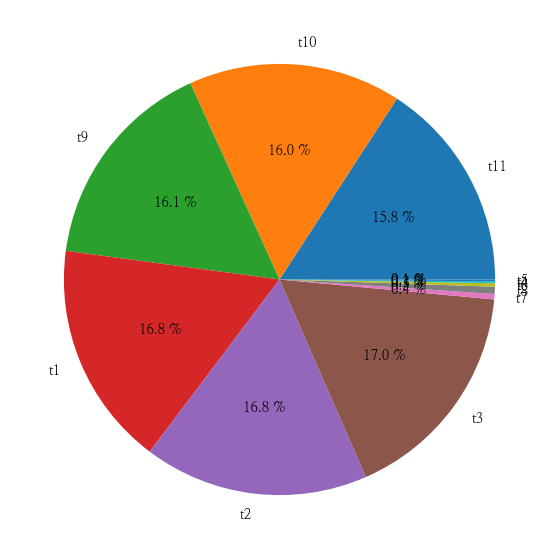

In [130]:
r.get_security_weights().sum(axis=0).plot.pie(autopct='%.1f %%', ylabel='', figsize=(7,7));

In [131]:
w = r.get_security_weights()[start:]
w

,t11,t10,t9,t1,t2,t3,t7,t8,t6,t4,t5
2001-08-01,0.333,0.333,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001-08-02,0.333,0.333,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001-08-03,0.333,0.333,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001-08-06,0.333,0.333,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001-08-07,0.333,0.333,0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,0.332,0.333,0.335,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2021-12-27,0.332,0.333,0.335,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2021-12-28,0.332,0.333,0.335,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2021-12-29,0.332,0.333,0.335,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [132]:
r_all.prices.columns

Index(['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11'], dtype='object')

In [133]:
weights = {}
for c in list(r_all.prices.columns):
    weights[c]= r_all.get_security_weights(c)

In [134]:
weights['t1']['kbond20y']  = 0
weights['t11']['kodex200'] = 0

In [135]:
weights

{'t1':             kodex200  kbond20y
 2001-01-01     0.000         0
 2001-01-02     1.000         0
 2001-01-03     1.000         0
 2001-01-04     1.000         0
 2001-01-05     1.000         0
 ...              ...       ...
 2021-12-24     1.000         0
 2021-12-27     1.000         0
 2021-12-28     1.000         0
 2021-12-29     1.000         0
 2021-12-30     1.000         0
 
 [5193 rows x 2 columns],
 't2':             kodex200  kbond20y
 2001-01-01     0.000     0.000
 2001-01-02     0.900     0.100
 2001-01-03     0.900     0.100
 2001-01-04     0.901     0.098
 2001-01-05     0.903     0.097
 ...              ...       ...
 2021-12-24     0.906     0.094
 2021-12-27     0.905     0.095
 2021-12-28     0.906     0.094
 2021-12-29     0.906     0.094
 2021-12-30     0.906     0.094
 
 [5193 rows x 2 columns],
 't3':             kodex200  kbond20y
 2001-01-01     0.000     0.000
 2001-01-02     0.800     0.200
 2001-01-03     0.800     0.200
 2001-01-04     0.802     0.19

In [136]:
w1 = weights['t2'] * 0.0 # 0.0으로 초기화
w1

,kodex200,kbond20y
2001-01-01,0.000,0.000
2001-01-02,0.000,0.000
2001-01-03,0.000,0.000
2001-01-04,0.000,0.000
2001-01-05,0.000,0.000
...,...,...
2021-12-24,0.000,0.000
2021-12-27,0.000,0.000
2021-12-28,0.000,0.000
2021-12-29,0.000,0.000


In [137]:
for c in list(r_all.prices.columns):
    w1 += weights[c].mul(w[c], axis=0)

In [138]:
w1.dropna()

,kodex200,kbond20y
2001-08-01,0.103,0.897
2001-08-02,0.103,0.897
2001-08-03,0.103,0.897
2001-08-06,0.103,0.897
2001-08-07,0.103,0.897
...,...,...
2021-12-24,0.106,0.894
2021-12-27,0.105,0.895
2021-12-28,0.106,0.894
2021-12-29,0.106,0.894


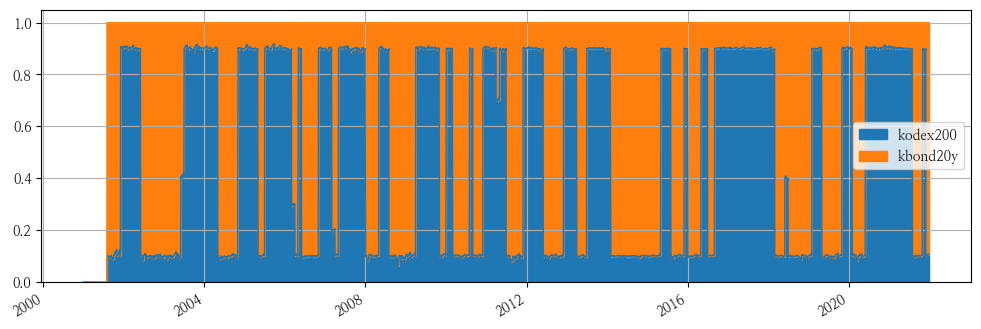

In [139]:
w1.plot.area(figsize=(12, 4));

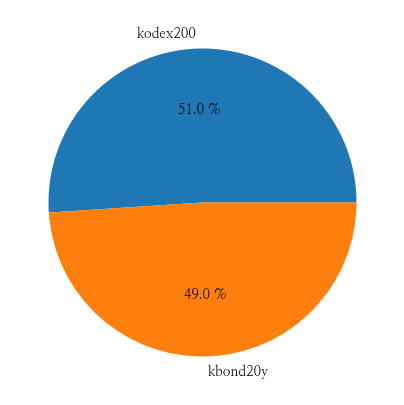

In [140]:
w1.dropna().sum().plot.pie(autopct='%.1f %%', ylabel='', figsize=(5,5));

In [141]:
bt_kospi = long_only_ew(data, ['kodex200'], 'kodex200')
bt_bond = long_only_ew(data, ['kbond20y'], 'kbond20y')

r_kospi = bt.run(bt_kospi)
r_bond  = bt.run(bt_bond)

2001-01-02 00:00:00
2001-01-02 00:00:00


In [142]:
st_ew = bt.Strategy("ew",
        [
            bt.algos.RunMonthly(run_on_end_of_period=True),
            bt.algos.RunAfterDate(after_date),
            bt.algos.SelectAll(),
            #-------------------------------------------
            bt.algos.WeighEqually(),
            #-------------------------------------------
            PrintTempWeights(),
            bt.algos.Rebalance()
        ]
)
bt_ew = bt.Backtest(st_ew, data, initial_capital=100000000.0)
r_ew = bt.run(bt_ew)

2001-08-31 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2001-09-28 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2001-10-31 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2001-11-30 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2001-12-28 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-01-31 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-02-28 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-03-29 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-04-30 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-05-31 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-06-28 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-07-31 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-08-30 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-09-30 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-10-31 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-11-29 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2002-12-30 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2003-01-30 00:00:00 ew kodex200:0.500 kbond20y:0.500 
2003-02-28 00:00:00 ew kodex

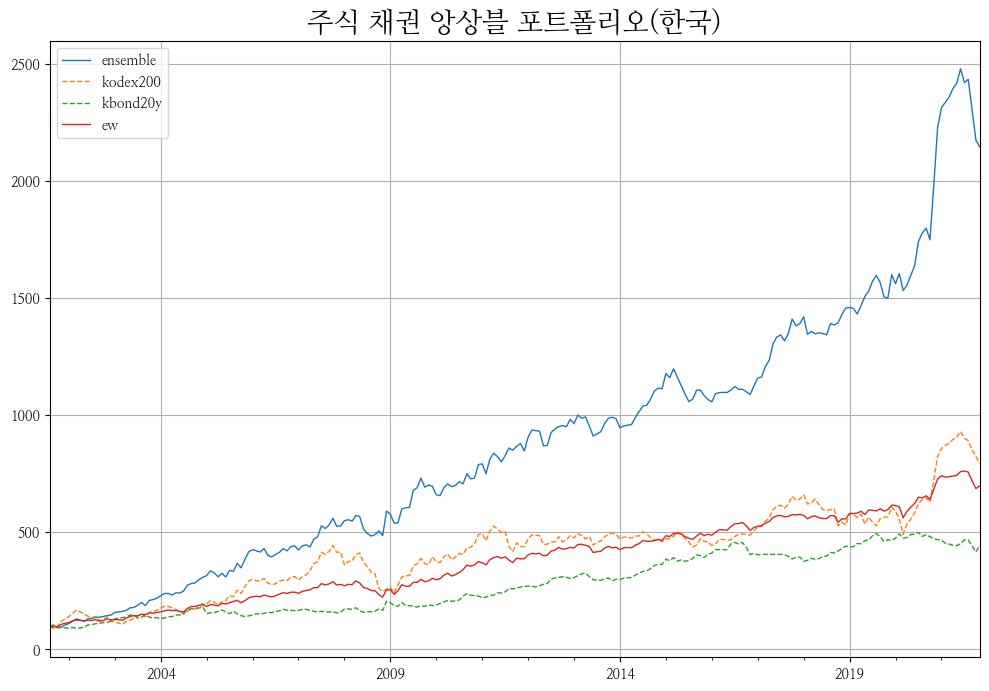

In [143]:
r_kospi.set_date_range(start,e)
r_bond.set_date_range(start,e)
r_ew.set_date_range(start,e)

ax1 = r.plot(freq='M', figsize=(12,8));
r_kospi.plot(ax=ax1, freq='M', ls='--', figsize=(12,8));
r_bond.plot(ax=ax1, freq='M', ls='--', figsize=(12,8));
r_ew.plot(ax=ax1, freq='M', ls='-', figsize=(12,8));
plt.title("주식 채권 앙상블 포트폴리오(한국)", fontsize=20);

In [144]:
r_asset = bt.run(bt_kospi, bt_bond, bt_ew, bt_ensemble)
r_asset.set_date_range(start, e)
r_asset.display()

Stat                 kodex200    kbond20y    ew          ensemble
-------------------  ----------  ----------  ----------  ----------
Start                2001-08-01  2001-08-01  2001-08-01  2001-08-01
End                  2021-12-30  2021-12-30  2021-12-30  2021-12-30
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         718.73%     381.99%     618.43%     2253.04%
Daily Sharpe         0.58        0.70        0.88        1.14
Daily Sortino        0.93        1.12        1.43        1.88
CAGR                 10.85%      8.01%       10.14%      16.73%
Max Drawdown         -52.67%     -24.47%     -29.18%     -19.47%
Calmar Ratio         0.21        0.33        0.35        0.86

MTD                  6.52%       -0.44%      3.04%       1.78%
3m                   -0.81%      0.09%       -0.16%      -5.31%
6m                   -9.05%      -1.83%      -5.27%      -11.93%
YTD                  2.77%       -5.54%      -1.15%      -2.05%
1Y                   2.77%  

In [145]:
r_asset.prices.resample('M').last().to_drawdown_series().min()

kodex200   -0.455
kbond20y   -0.225
ew         -0.237
ensemble   -0.154
dtype: float64

In [146]:
r_asset.prices.resample('MS').first().to_drawdown_series().min()

kodex200   -0.468
kbond20y   -0.216
ew         -0.245
ensemble   -0.170
dtype: float64

In [147]:
def plot_assets(backtest_result, start, end, strategy_name, weights, **kwargs):
    res1 = backtest_result
    start = start
    end = end
    plt.rcParams["figure.figsize"] = [16, 12]
    plt.subplots_adjust(hspace=0)

    color_dict = kwargs.pop('color_dict', None)

    # 첫번째 칸에 그림을 그린다.
    ax1 = plt.subplot2grid((3,1), (0,0), rowspan=2)
    # 두개를 한 칸에 그리기 위해 ax=ax1으로 axis공유
    if color_dict:
        color = [color_dict.get(x, "#333333") for x in res1.prices.columns]
        ax2 = res1.prices[start:end].rebase(1).plot(ax=ax1, lw=1, color=color, logy=True, **kwargs) # 모든 데이터 r_all
    else:
        ax2 = res1.prices[start:end].rebase(1).plot(ax=ax1, lw=1, logy=True, **kwargs) # 모든 데이터 r_all
    for line in ax2.get_lines():
        if line.get_label() == strategy_name:
            line.set_linewidth(3)
    plt.legend(loc="upper left");
    plt.title(strategy_name, fontsize=20)
    weights[start:end].plot.area(alpha=0.2, ax=ax1, secondary_y=True, **kwargs)


    # 두번째 칸에 그림을 그린다.
    # drawdown을 그림다. 두개를 하나에 그리기 위해 ax=ax2로 axis를 공유
    ax2 = plt.subplot2grid((3,1), (2,0))
    if color_dict:
        color = [color_dict.get(x, "#333333") for x in res1.prices.columns]
        res1.prices[start:end].to_drawdown_series().plot.area(stacked=False, color=color, legend=True, ax=ax2, **kwargs)
    else:
        res1.prices[start:end].to_drawdown_series().plot.area(stacked=False,legend=True, ax=ax2, **kwargs)
    res1.prices.loc[start:end,strategy_name].to_drawdown_series().plot(legend=False, color='black', alpha=1, lw=1, ls='-', ax=ax2)

    print(res1.prices[start:end].calc_cagr().to_frame().rename(columns={0: "CAGR"})*100)
    print(res1.prices[start:end].calc_max_drawdown().to_frame().rename(columns={0: "MDD"})*100)


           CAGR
kodex200 10.849
kbond20y  8.009
ew       10.142
ensemble 16.733
             MDD
kodex200 -52.666
kbond20y -24.471
ew       -29.180
ensemble -19.472


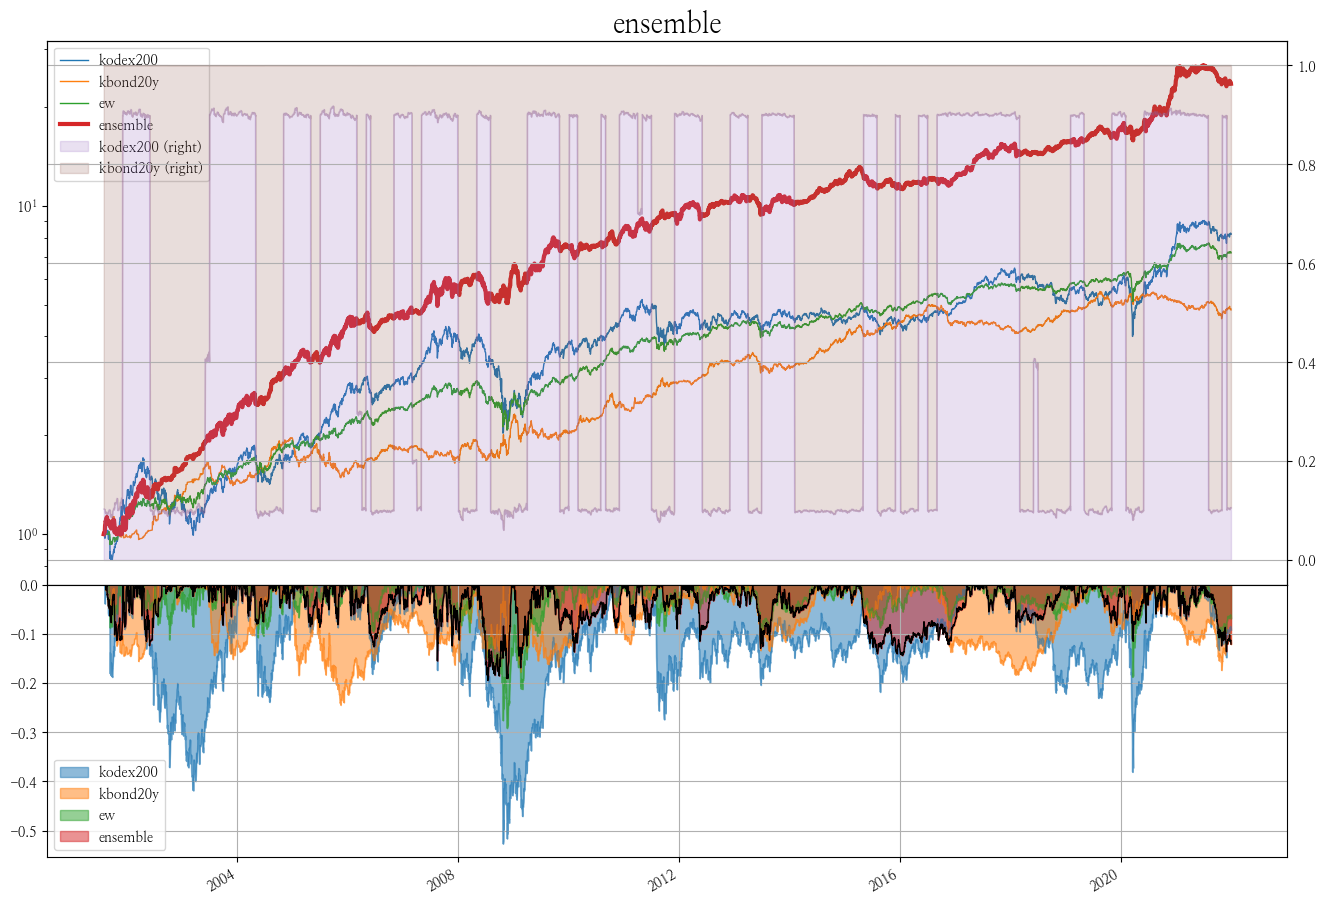

In [148]:
plot_assets(r_asset, start, e, 'ensemble', w1)

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2001-08-02  2001-08-02
End Period                 2021-12-30  2021-12-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      99.0%

Cumulative Return          2,253.04%   718.73%
CAGR﹪                     16.72%      10.84%

Sharpe                     1.14        0.58
Smart Sharpe               1.13        0.57
Sortino                    1.69        0.82
Smart Sortino              1.67        0.82
Sortino/√2                 1.19        0.58
Smart Sortino/√2           1.18        0.58
Omega                      1.24        1.24

Max Drawdown               -19.47%     -52.67%
Longest DD Days            743         2142
Volatility (ann.)          14.73%      22.38%
R^2                        0.32        0.32
Calmar                     0.86        0.21
Skew                       0.01        -0.11
Kurtosis                   5.62       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-05-19,2008-07-16,2008-12-19,214,-19.472,-19.054
2,2009-01-09,2009-02-18,2009-05-20,131,-16.883,-16.399
3,2007-07-26,2007-08-17,2007-10-02,68,-15.498,-13.006
4,2015-04-13,2016-01-19,2017-04-25,743,-14.406,-14.051
5,2009-09-23,2010-02-08,2010-09-30,372,-13.672,-12.935


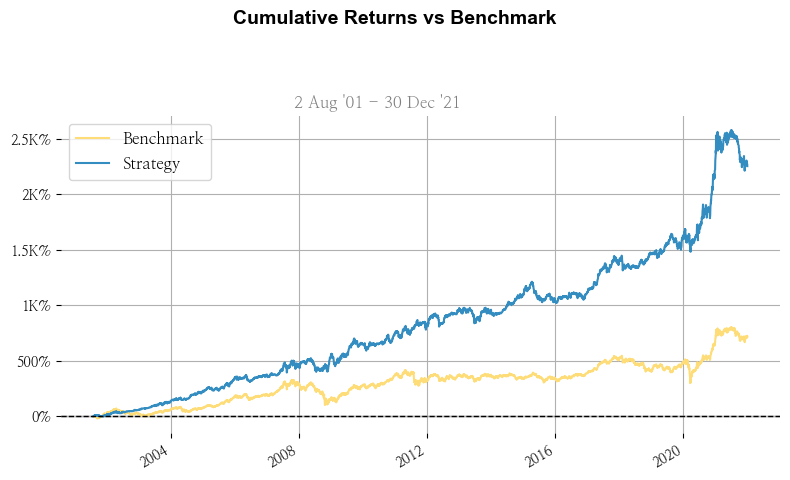

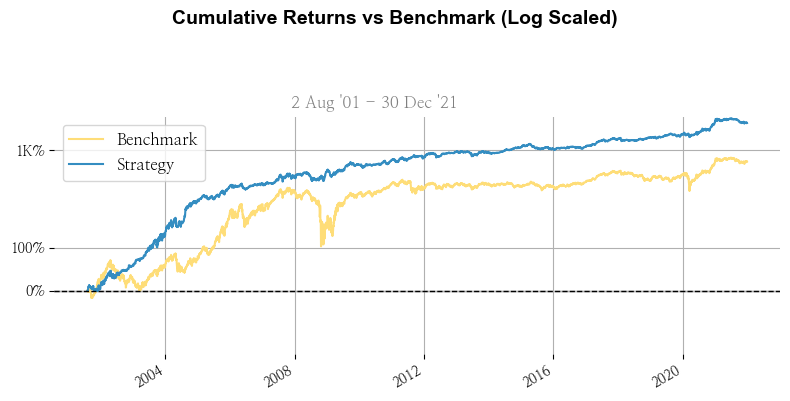

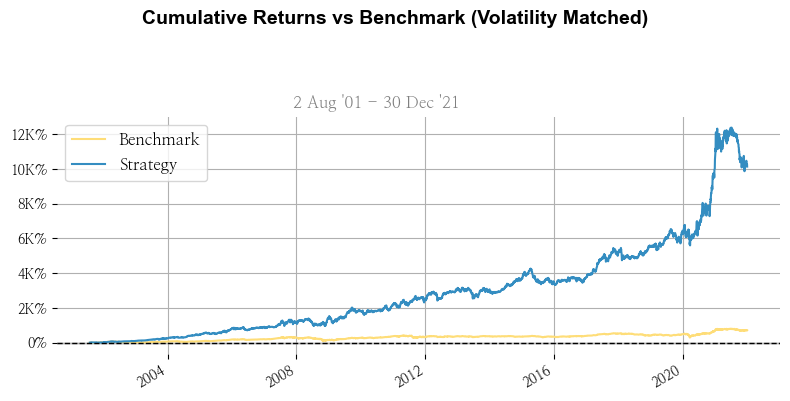

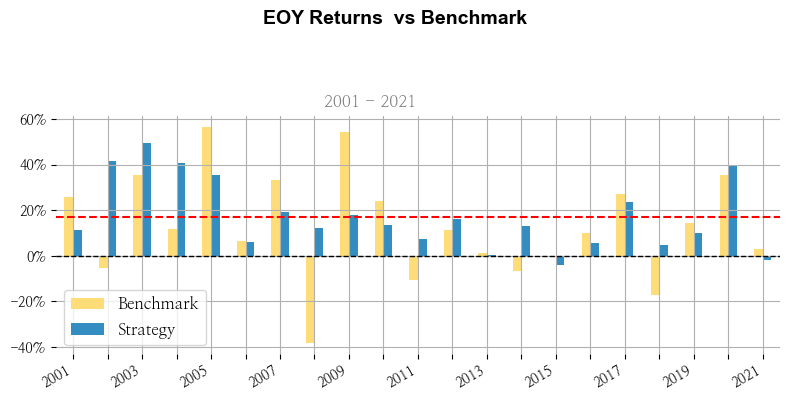

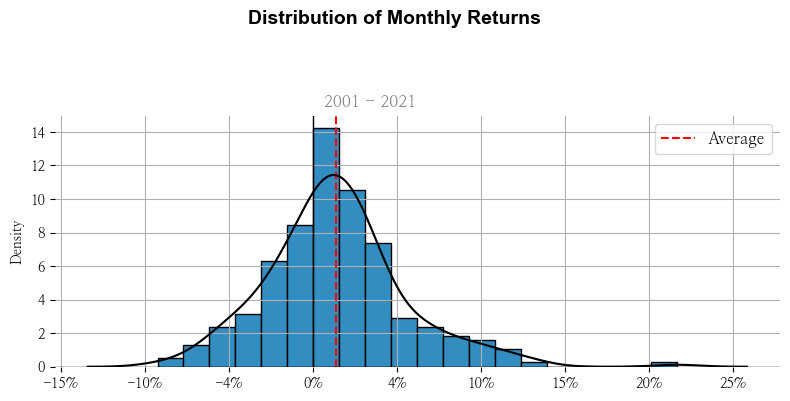

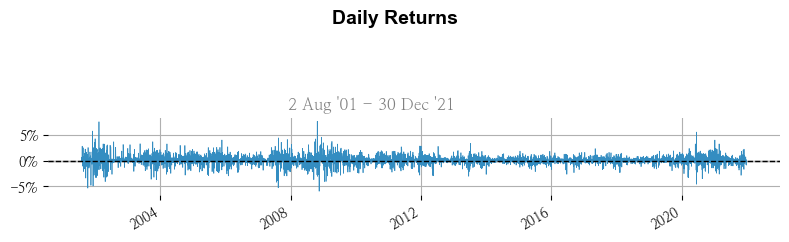

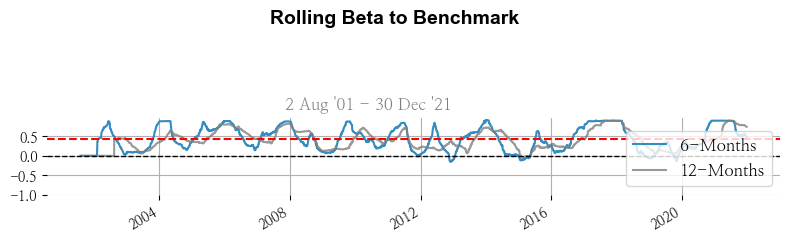

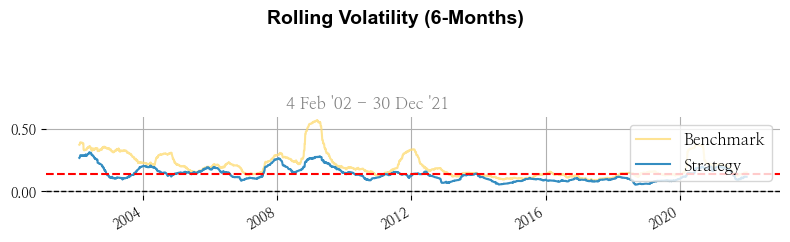

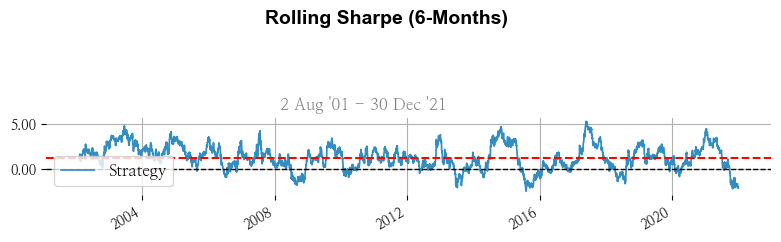

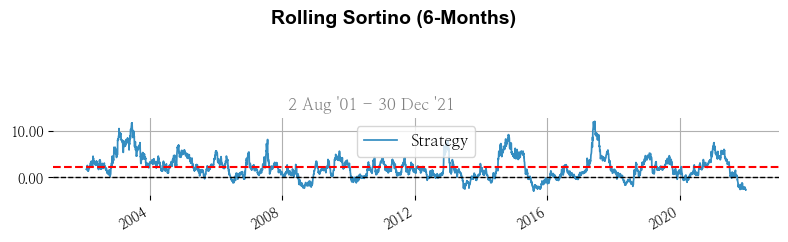

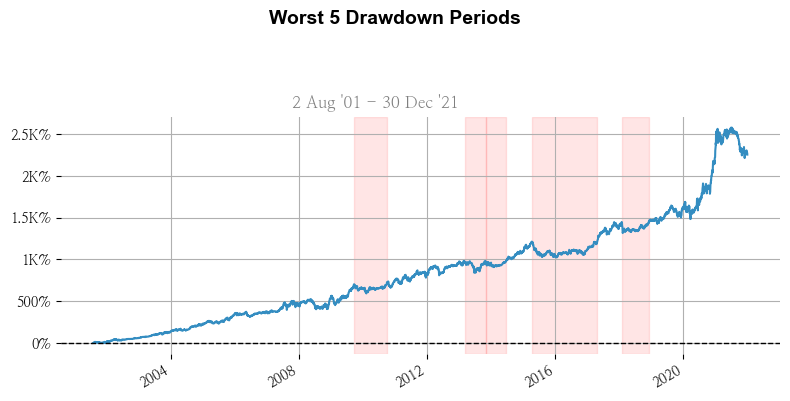

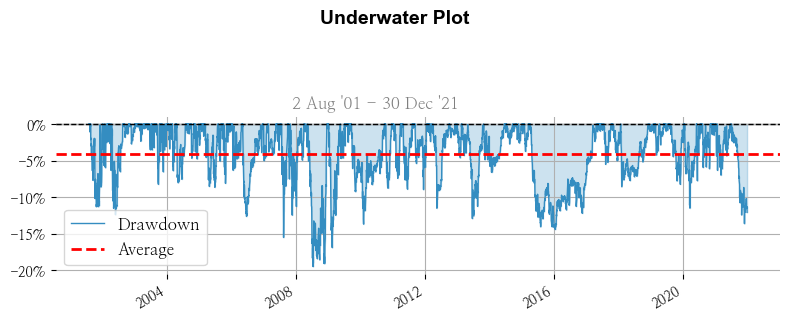

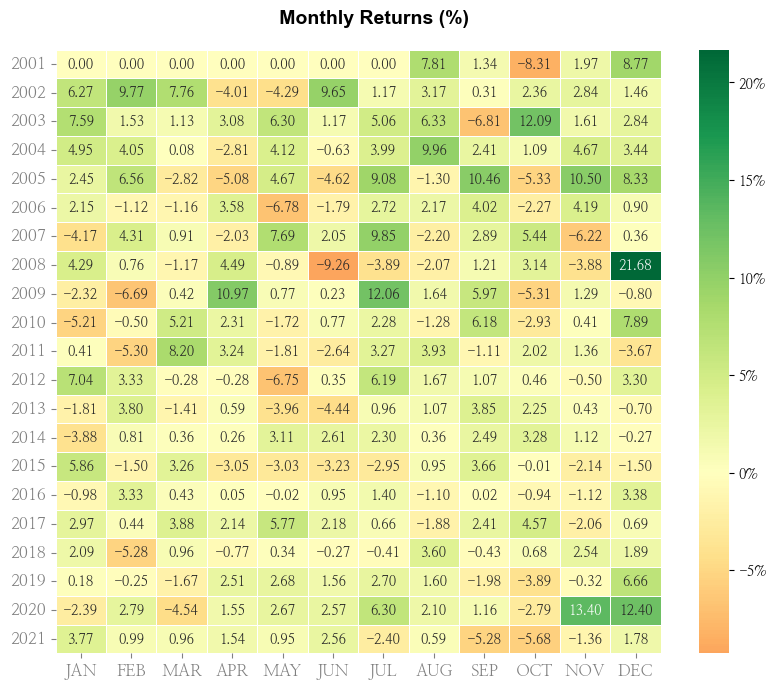

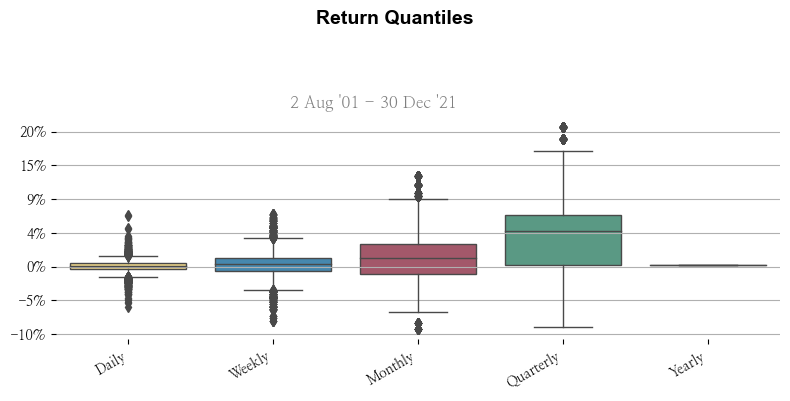

In [149]:
qs.reports.full(r.prices.loc[start:e, 'ensemble'].pct_change().dropna(), 
                r_kospi.prices.loc[start:e, 'kodex200'].pct_change().dropna())